In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import openpyxl 
%run Funcoes.ipynb

In [4]:
soja_df = pd.read_excel(r"C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\Excel Preço local Barreiras.xlsx")    #o r antes da string significa uma string raw em que o caminho do arquivo é lido normalmente
soja_df

,Data,Preço
0,2012-01-02,41.5
1,2012-01-03,41.5
2,2012-01-04,41.5
3,2012-01-05,41.5
4,2012-01-06,41.5
...,...,...
2508,2024-02-05,100.13
2509,2024-02-06,100.13
2510,2024-02-07,101.25
2511,2024-02-08,101.13


In [5]:
soja_df = soja_df.rename(columns={'Data':'DATA'})
soja_df = soja_df.set_index('DATA')
soja_df

,Preço
DATA,
2012-01-02,41.5
2012-01-03,41.5
2012-01-04,41.5
2012-01-05,41.5
2012-01-06,41.5
...,...
2024-02-05,100.13
2024-02-06,100.13
2024-02-07,101.25


In [6]:
soja_df['Preço'] = pd.to_numeric(soja_df['Preço'], errors='coerce')
soja_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2012-01-02 to 2024-02-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preço   2512 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [7]:
soja_df.dropna(subset=['Preço'],inplace=True)
soja_df = soja_df.rename(columns={'Preço':'PRECOLOCAL'})
soja_df.iloc[1450:1470]

,PRECOLOCAL
DATA,
2019-09-20,72.00
2019-09-23,71.75
2019-09-24,71.75
2019-09-25,71.75
2019-09-26,71.75
2019-09-27,71.75
2019-09-30,73.00
2019-10-01,73.50
2019-10-02,74.00


In [8]:
futuro_df = pd.read_csv(r'C:\Users\Lenovo\Documents\MeusProjetos\Analise-Sincronia-SeriesTemporais-Soja\soybean-prices-historical-chart-data.csv')

futuro_df

,date,value
0,1968-12-05,2.4375
1,1968-12-06,2.4475
2,1968-12-09,2.4363
3,1968-12-10,2.4375
4,1968-12-11,2.4463
...,...,...
13912,2024-02-09,11.9600
13913,2024-02-12,11.9300
13914,2024-02-13,11.8700
13915,2024-02-14,11.6800


In [9]:
futuro_df = futuro_df.rename(columns={'date':'DATA', ' value':'PRECOFUTURO'})
futuro_df['DATA'] = pd.to_datetime(futuro_df['DATA'])
futuro_df.set_index('DATA', inplace=True)

futuro_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13917 entries, 1968-12-05 to 2024-02-15
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRECOFUTURO  13917 non-null  float64
dtypes: float64(1)
memory usage: 217.5 KB


In [10]:
sojas_df = pd.merge(soja_df['PRECOLOCAL'], futuro_df, how='left', on='DATA')
sojas_df.loc['2022-01-14':'2022-01-20']

,PRECOLOCAL,PRECOFUTURO
DATA,,
2022-01-14,162.67,13.6975
2022-01-17,162.67,NaN
2022-01-18,162.67,13.6125
2022-01-19,156.50,13.9125
2022-01-20,154.00,14.2575


In [14]:
sojas_df.dropna(inplace=True)
sojas_df.loc['2022-01-14':'2022-01-20']

,PRECOLOCAL,PRECOFUTURO
DATA,,
2022-01-14,162.67,13.6975
2022-01-18,162.67,13.6125
2022-01-19,156.50,13.9125
2022-01-20,154.00,14.2575


In [15]:
from requests import get
url = "https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)?@dataInicial='01-03-2012'&@dataFinalCotacao='02-15-2024'&$top=1000000&$format=json&$select=cotacaoCompra,dataHoraCotacao"
r = get(url)
r = r.json()
dolar_df = pd.DataFrame(r['value'])
dolar_df

,cotacaoCompra,dataHoraCotacao
0,1.8450,2012-01-03 13:06:40.81
1,1.8265,2012-01-04 13:09:47.168
2,1.8365,2012-01-05 13:15:24.169
3,1.8442,2012-01-06 13:09:54.909
4,1.8435,2012-01-09 13:03:03.456
...,...,...
3037,4.9602,2024-02-07 14:22:27.517
3038,4.9798,2024-02-08 15:58:03.35
3039,4.9711,2024-02-09 17:00:17.365
3040,4.9717,2024-02-14 16:08:18.894


In [16]:
dolar_df = dolar_df[['dataHoraCotacao','cotacaoCompra']].rename(columns={'cotacaoCompra':'DOLAR_PTAX', 'dataHoraCotacao':'DATA'}).copy()
dolar_df.DATA = pd.to_datetime(dolar_df.DATA).dt.strftime('%Y-%m-%d')
dolar_df.DATA = pd.to_datetime(dolar_df.DATA)
dolar_df.set_index('DATA', inplace=True)

In [17]:
result_df = pd.merge(sojas_df[['PRECOLOCAL', 'PRECOFUTURO']], dolar_df, on='DATA')
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2012-01-03,41.50,12.275,1.8450
2012-01-04,41.50,12.300,1.8265
2012-01-05,41.50,12.090,1.8365
2012-01-06,41.50,11.965,1.8442
2012-01-09,41.50,12.330,1.8435
...,...,...,...
2024-02-05,100.13,11.980,5.0047
2024-02-06,100.13,12.000,4.9681
2024-02-07,101.25,11.900,4.9602


In [18]:
conversao_saca_bushel = 2.2046
result_df.PRECOLOCAL = (result_df.PRECOLOCAL / result_df.DOLAR_PTAX) / conversao_saca_bushel
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX
DATA,,,
2012-01-03,10.202860,12.275,1.8450
2012-01-04,10.306201,12.300,1.8265
2012-01-05,10.250083,12.090,1.8365
2012-01-06,10.207286,11.965,1.8442
2012-01-09,10.211162,12.330,1.8435
...,...,...,...
2024-02-05,9.075203,11.980,5.0047
2024-02-06,9.142060,12.000,4.9681
2024-02-07,9.259042,11.900,4.9602


In [19]:
result_df['BASIS'] = (result_df.PRECOLOCAL - result_df.PRECOFUTURO)*100
result_df

,PRECOLOCAL,PRECOFUTURO,DOLAR_PTAX,BASIS
DATA,,,,
2012-01-03,10.202860,12.275,1.8450,-207.214010
2012-01-04,10.306201,12.300,1.8265,-199.379879
2012-01-05,10.250083,12.090,1.8365,-183.991750
2012-01-06,10.207286,11.965,1.8442,-175.771418
2012-01-09,10.211162,12.330,1.8435,-211.883834
...,...,...,...,...
2024-02-05,9.075203,11.980,5.0047,-290.479668
2024-02-06,9.142060,12.000,4.9681,-285.793964
2024-02-07,9.259042,11.900,4.9602,-264.095828


In [20]:
# Calcular basis (diferença entre futuros e spot)
basis = result_df.PRECOLOCAL - result_df.PRECOFUTURO

# Calcular momentum (retorno acumulado)
momentum = result_df.PRECOLOCAL.pct_change().rolling(window=3).sum()  # Exemplo: retorno acumulado nos últimos 3 meses

momentum


DATA
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06    0.000508
2012-01-09   -0.009241
                ...   
2024-02-05   -0.034355
2024-02-06   -0.031910
2024-02-07   -0.016668
2024-02-08    0.015047
2024-02-15    0.015713
Name: PRECOLOCAL, Length: 2454, dtype: float64

In [23]:
# Gerar sinais de negociação com base em basis e momentum
sinais = pd.DataFrame(index=result_df.PRECOFUTURO.index)
sinais['Sinal_Compra'] = np.where((basis > 0) & (momentum > 0), 1, 0)  # Exemplo de condição de compra
sinais['Sinal_Venda'] = np.where((basis < 0) & (momentum < 0), -1, 0)  # Condição de venda

# Combinar os sinais de compra e venda para gerar o sinal final (1 para compra, -1 para venda)
sinais['Sinal_Final'] = sinais['Sinal_Compra'] + sinais['Sinal_Venda']
# Exemplo de condição de venda: vender se basis for negativo e momentum estiver caindo


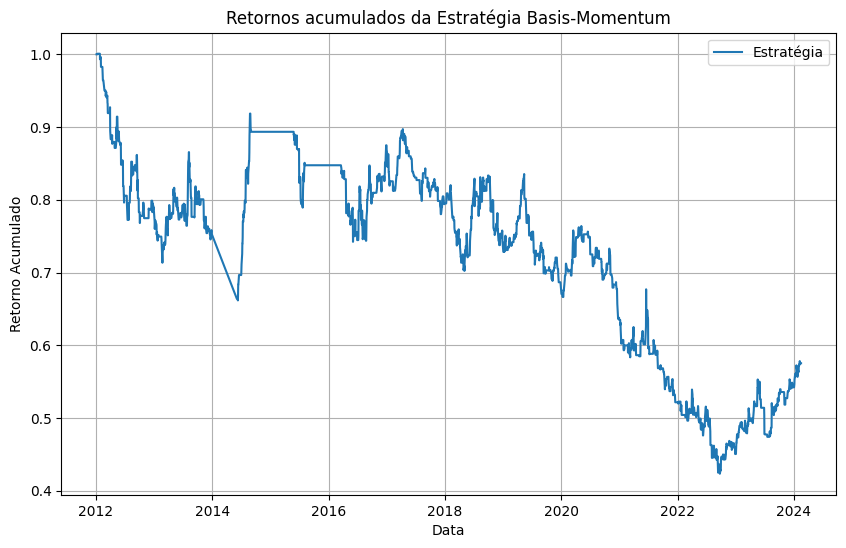

In [25]:
# Calcular retornos da estratégia
sinais['Retornos'] = sinais['Sinal_Final'].shift(1) * result_df.PRECOFUTURO.pct_change()

# Calcular retorno acumulado da estratégia
ret_acm = (1 + sinais['Retornos']).cumprod()

# Plotar o retorno acumulado da estratégia versus o benchmark
plt.figure(figsize=(10, 6))
plt.plot(ret_acm, label='Estratégia')  # Retorno acumulado da estratégia
plt.title('Retornos acumulados da Estratégia Basis-Momentum')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True)
plt.show()



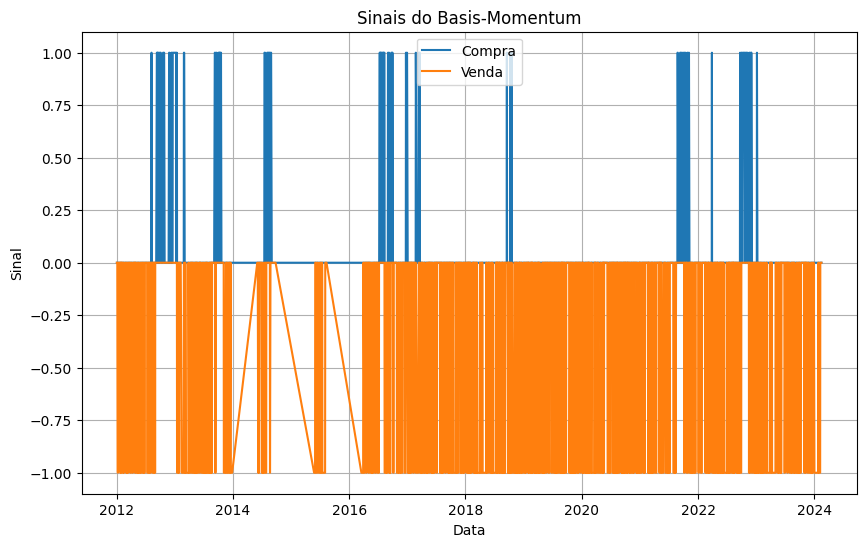

In [27]:
# Plotar os sinais
plt.figure(figsize=(10, 6))
plt.plot(sinais.Sinal_Compra, label='Compra')
plt.plot(sinais.Sinal_Venda, label='Venda')
#plt.plot(sinais.Sinal_Final, label='Decisão')
plt.title('Sinais do Basis-Momentum')
plt.xlabel('Data')
plt.ylabel('Sinal')
plt.legend()
plt.grid(True)
plt.show()

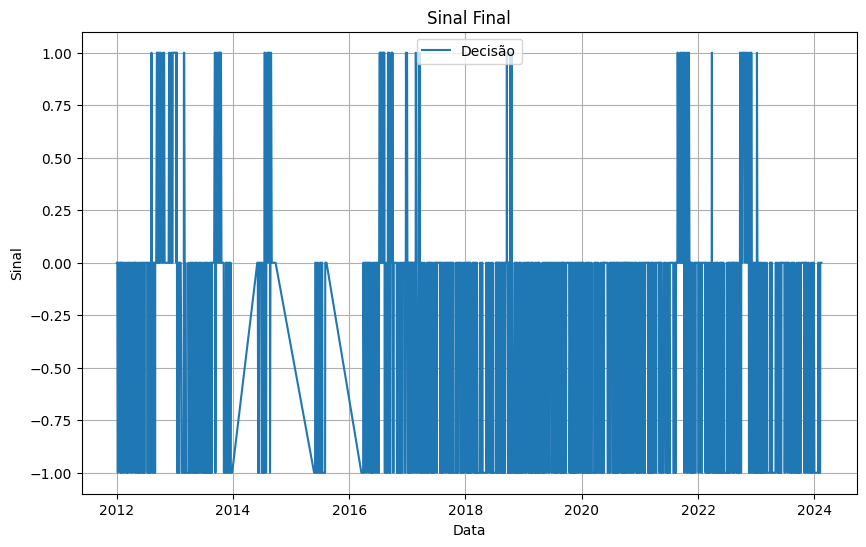

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(sinais.Sinal_Final, label='Decisão')
plt.title('Sinal Final')
plt.xlabel('Data')
plt.ylabel('Sinal')
plt.legend()
plt.grid(True)
plt.show()